In [ ]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific 
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived 
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, 
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, 
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/ 
#     Docs: https://pandas.pydata.org/docs/ 
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html 
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a 
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.7.15
numpy version: 1.21.6
pandas version:  1.3.5
seaborn version: 0.11.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


# [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)


Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

----------------------------Underfitting--------------------------------------BestFit-------------------------------------------Overfitting-------------------

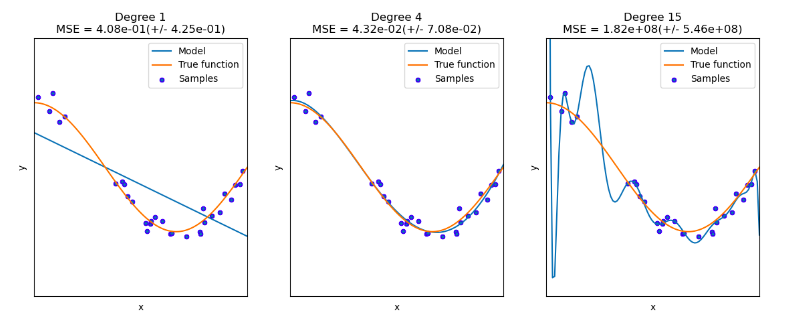

### generate data  

In [ ]:
# sample variable function - f(x) = y = sine(2*pi*x)
X=np.random.uniform(low=0,high=0.7,size=100)# 100 samples (questions)
X.sort()# make value sort 
y=np.sin(2*np.pi*X)# ideal data 
y_impure=y+np.random.normal(loc=0,scale=0.25,size=y.size)# add noise (general form of data)
# see shape of data 
X.shape,y.shape,y_impure.shape

((100,), (100,), (100,))

### plot data 

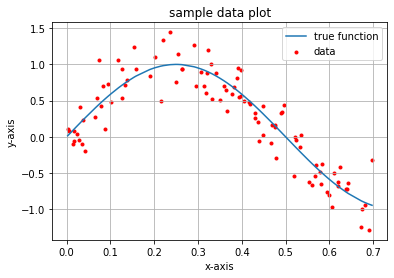

In [ ]:
# plot true function 
plt.plot(X,y,label='true function')
# plot data (general data, i.e. with impurities)
plt.scatter(X,y_impure,color='red',marker='.',label='data')
# add grid and labels - axis and title 
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis')
plt.title('sample data plot')
# add legend 
plt.legend()
# make show data
plt.show() 

### split data - train and test (by [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
# split data 
from sklearn.model_selection import train_test_split 
# make data split with test size -> 30%
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y_impure,test_size=0.3)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape# see shapes

((70,), (70,), (30,), (30,))

### Regression using linear model

Using - 

* **[Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**: Generate polynomial and interaction features. Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

* **[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**: Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
# load modele - Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# load modele - Linear Regression
from sklearn.linear_model import LinearRegression
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
# load model - Pipeline
from sklearn.pipeline import Pipeline
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# make polynomial features (object)
polynomial_features_linear=PolynomialFeatures(degree=1,include_bias=False)
# make Linear Regression (object) 
linear_regression_linear=LinearRegression()
# make model pipeline (object)
pipeline_linear=Pipeline([('polynomial_features',polynomial_features_linear),('linear_regression',linear_regression_linear),])
# make model train 
pipeline_linear.fit(Xtrain.reshape(-1,1),ytrain)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

### Regression using linear model with polynomial features degree = 4

In [ ]:
# load modele - Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# load modele - Linear Regression
from sklearn.linear_model import LinearRegression
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
# load model - Pipeline
from sklearn.pipeline import Pipeline
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# make polynomial features (object)
polynomial_features_4=PolynomialFeatures(degree=4,include_bias=False)
# make Linear Regression (object) 
linear_regression_4=LinearRegression()
# make model pipeline (object)
pipeline_4=Pipeline([('polynomial_features',polynomial_features_4),('linear_regression',linear_regression_4),])
# make model train 
pipeline_4.fit(Xtrain.reshape(-1,1),ytrain)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

### Regression using linear model with polynomial features degree = 20

In [ ]:
# load modele - Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# load modele - Linear Regression
from sklearn.linear_model import LinearRegression
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
# load model - Pipeline
from sklearn.pipeline import Pipeline
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# make polynomial features (object)
polynomial_features_20=PolynomialFeatures(degree=20,include_bias=False)
# make Linear Regression (object) 
linear_regression_20=LinearRegression()
# make model pipeline (object)
pipeline_20=Pipeline([('polynomial_features',polynomial_features_15),('linear_regression',linear_regression_15),])
# make model train 
pipeline_20.fit(Xtrain.reshape(-1,1),ytrain)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

### [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)

In [ ]:
# load maen absolute error 
from sklearn.metrics import mean_absolute_error

# calculate error - MAE (mean absolute error) (linear)
print('MAE (linear) (training):',mean_absolute_error(ytrain,pipeline_linear.predict(Xtrain.reshape(-1,1))))
print('MAE (linear) (testing):',mean_absolute_error(ytest,pipeline_linear.predict(Xtest.reshape(-1,1))))
# calculate error - MAE (mean absolute error) (degree - 4)
print('MAE (degree - 4) (training):',mean_absolute_error(ytrain,pipeline_4.predict(Xtrain.reshape(-1,1))))
print('MAE (degree - 4) (testing):',mean_absolute_error(ytest,pipeline_4.predict(Xtest.reshape(-1,1))))
# calculate error - MAE (mean absolute error) (degree - 15)
print('MAE (degree - 15) (training):',mean_absolute_error(ytrain,pipeline_20.predict(Xtrain.reshape(-1,1))))
print('MAE (degree - 15) (testing):',mean_absolute_error(ytest,pipeline_20.predict(Xtest.reshape(-1,1))))

MAE (linear) (training): 0.43494727790785914
MAE (linear) (testing): 0.43932028165852827
MAE (degree - 4) (training): 0.18717381100679686
MAE (degree - 4) (testing): 0.18784809389044296
MAE (degree - 15) (training): 0.1643735407689053
MAE (degree - 15) (testing): 0.1994865816039116


### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)

In [ ]:
# load maen absolute error 
from sklearn.metrics import mean_squared_error

# calculate error - MAE (mean absolute error) (linear)
print('MSE (linear) (training):',mean_squared_error(ytrain,pipeline_linear.predict(Xtrain.reshape(-1,1))))
print('MSE (linear) (testing):',mean_squared_error(ytest,pipeline_linear.predict(Xtest.reshape(-1,1))))
# calculate error - MAE (mean absolute error) (degree - 4)
print('MSE (degree - 4) (training):',mean_squared_error(ytrain,pipeline_4.predict(Xtrain.reshape(-1,1))))
print('MSE (degree - 4) (testing):',mean_squared_error(ytest,pipeline_4.predict(Xtest.reshape(-1,1))))
# calculate error - MAE (mean absolute error) (degree - 15)
print('MSE (degree - 15) (training):',mean_squared_error(ytrain,pipeline_20.predict(Xtrain.reshape(-1,1))))
print('MSE (degree - 15) (testing):',mean_squared_error(ytest,pipeline_20.predict(Xtest.reshape(-1,1))))

MSE (linear) (training): 0.2594503664694382
MSE (linear) (testing): 0.26724394065493795
MSE (degree - 4) (training): 0.056894466992906595
MSE (degree - 4) (testing): 0.051808204428291774
MSE (degree - 15) (training): 0.04254725126043248
MSE (degree - 15) (testing): 0.07516321755059134


### Plot results 

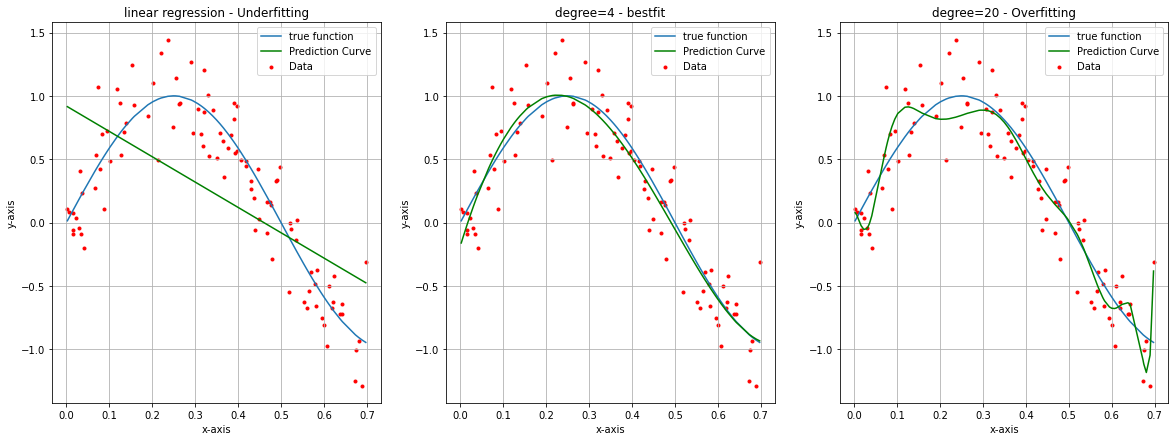

In [ ]:
# make figure 
plt.figure(figsize=(20,7))
# subplot curve - for linear model (degree=1)
plt.subplot(1,3,1)# subplot
plt.plot(X,y,label='true function')# plot true function
plt.scatter(X,y_impure,color='red',marker='.',label='Data')# plot data (general data, i.e. with impurities)
plt.plot(X,pipeline_linear.predict(X.reshape(-1,1)),color='g',label='Prediction Curve')# plot prediction curve
# add grid and labels - axis and title 
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis')
plt.title('linear regression - Underfitting')
plt.legend()# add legend 
# subplot curve - for linear model (degree=4)
plt.subplot(1,3,2)# subplot
plt.plot(X,y,label='true function')# plot true function
plt.scatter(X,y_impure,color='red',marker='.',label='Data')# plot data (general data, i.e. with impurities)
plt.plot(X,pipeline_4.predict(X.reshape(-1,1)),color='g',label='Prediction Curve')# plot prediction curve
# add grid and labels - axis and title 
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis')
plt.title('degree=4 - bestfit')
plt.legend()# add legend 
# subplot curve - for linear model (degree=20)
plt.subplot(1,3,3)# subplot
plt.plot(X,y,label='true function')# plot true function
plt.scatter(X,y_impure,color='red',marker='.',label='Data')# plot data (general data, i.e. with impurities)
plt.plot(X,pipeline_20.predict(X.reshape(-1,1)),color='g',label='Prediction Curve')# plot prediction curve
# add grid and labels - axis and title 
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis')
plt.title('degree=20 - Overfitting')
plt.legend()# add legend 
plt.show()# show all

# Is this best Results ? 

* [CS229 - Machine Learning - Lecture 3 - The Concept of Underfitting and Overfitting](https://see.stanford.edu/Course/CS229/42) (Video)



# References / Further reading

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Matplotlib - Tutorials](https://matplotlib.org/stable/tutorials/index)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)